# Principal Component Analysis with Cancer Data

In [272]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [273]:
#2 Read the data as a data frame
# reading the CSV file into pandas dataframe

cancer_df = pd.read_csv(r"C:\Users\Admin\Downloads\Project_lab 5\breast-cancer-wisconsin-data.csv")  

In [274]:
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [275]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [276]:
cancer_df.drop("ID", axis=1, inplace=True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [277]:
cancer_df.shape

(699, 10)

In [278]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [279]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [280]:
# Making a list of missing value types
missing_values = ["0", "na", "-", "?"]
cancer_missing_df = pd.read_csv(r"C:\Users\Admin\Downloads\Project_lab 5\breast-cancer-wisconsin-data.csv", delimiter = ';', na_values = missing_values)
cancer_df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [281]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [282]:
cancer_df.replace(to_replace = '?', value = np.nan, inplace = True)
cancer_df.isnull().sum().sum()

16

In [283]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [284]:
cancer_df["Bare Nuclei"] = pd.to_numeric(cancer_df["Bare Nuclei"])
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [285]:
cancer_df["Bare Nuclei"].mode() 

0    1.0
dtype: float64

In [286]:
cancer_df.replace(to_replace = np.nan, value = 1.0, inplace = True)
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [287]:
cancer_df = cancer_df.astype({"Bare Nuclei":'int64'})
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [288]:
cancer_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [289]:
# Check for correlation of variable

In [290]:
cancer_df.corr(method ='pearson')


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [291]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [292]:
#Let us check for pair plots

In [293]:
cancer_df.drop("Class", axis=1)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
5,8,10,10,8,7,10,9,7,1
6,1,1,1,1,2,10,3,1,1
7,2,1,2,1,2,1,3,1,1
8,2,1,1,1,2,1,1,1,5
9,4,2,1,1,2,1,2,1,1


In [294]:
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


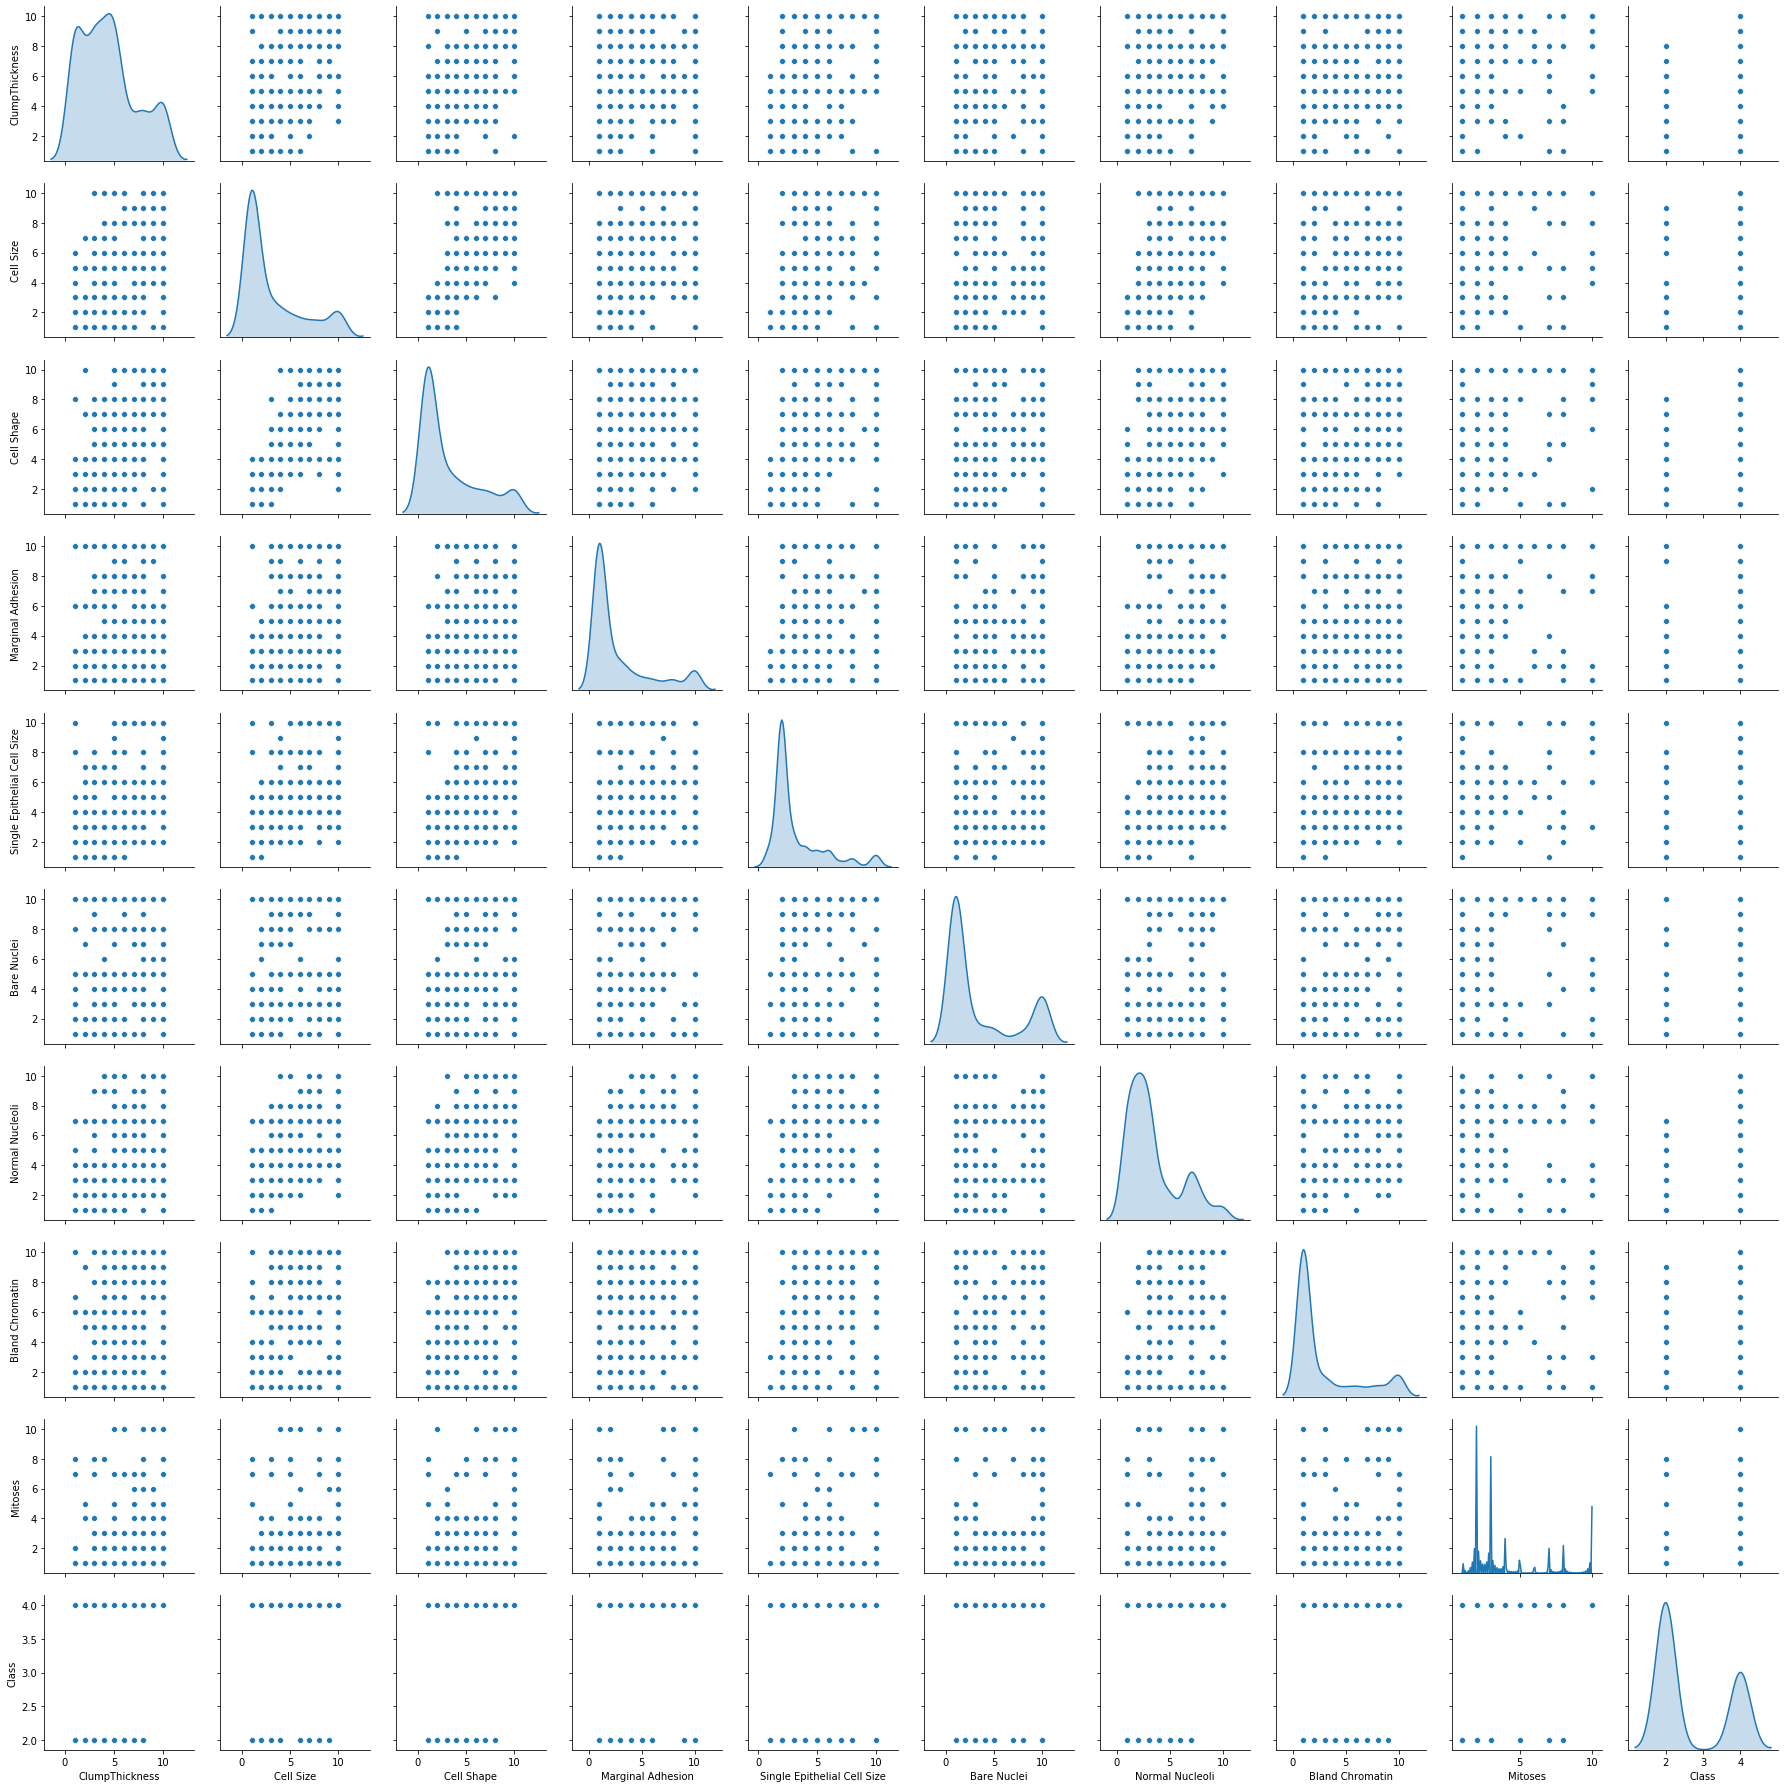

In [295]:
sns.pairplot(cancer_df,diag_kind='kde')

In [296]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [297]:
## Finding outliers using IQR method

Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ClumpThickness                 4.0
Cell Size                      4.0
Cell Shape                     4.0
Marginal Adhesion              3.0
Single Epithelial Cell Size    2.0
Bare Nuclei                    4.0
Normal Nucleoli                3.0
Bland Chromatin                3.0
Mitoses                        0.0
Class                          2.0
dtype: float64


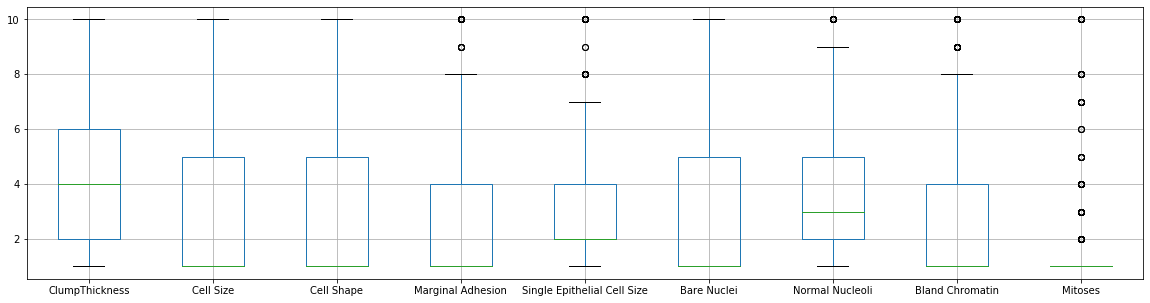

In [300]:
sns.boxplot = cancer_df.boxplot(column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses'], figsize=(20,5) )
#sns.boxplot = cancer_df.boxplot(,figsize(20,3))

In [301]:
pd.crosstab(cancer_df['Mitoses'],cancer_df['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [302]:
cancer_df['Mitoses'] = np.where(cancer_df['Mitoses'] > 4,4,cancer_df['Mitoses'])

In [303]:
pd.crosstab(cancer_df['Marginal Adhesion'],cancer_df['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [304]:
cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion'] > 4,4,cancer_df['Marginal Adhesion'])

In [305]:
pd.crosstab(cancer_df['Single Epithelial Cell Size'],cancer_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,46,1
2,363,23
3,29,43
4,7,41
5,5,34
6,2,39
7,3,9
8,2,19
9,0,2


In [306]:
cancer_df['Marginal Adhesion'] = np.where(cancer_df['Marginal Adhesion'] > 4,4,cancer_df['Marginal Adhesion'])

In [307]:
pd.crosstab(cancer_df['Normal Nucleoli'],cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,150,2
2,159,7
3,129,36
4,8,32
5,4,30
6,1,9
7,7,66
8,0,28
9,0,11


In [308]:
cancer_df['Normal Nucleoli'] = np.where(cancer_df['Normal Nucleoli'] > 4,4,cancer_df['Normal Nucleoli'])

In [309]:
pd.crosstab(cancer_df['Bland Chromatin'],cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [310]:
cancer_df['Bland Chromatin'] = np.where(cancer_df['Bland Chromatin'] > 4,4,cancer_df['Bland Chromatin'])

In [311]:
# We could see most of the outliers are now removed.

In [312]:
cancer_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,4,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,4,1,2
4,4,1,1,3,2,1,3,1,1,2


# Q6 Create a covariance matrix for identifying Principal components

In [313]:
# PCA
# Step 1 - Create covariance matrix

X=cancer_df.drop('Class',axis=1)
x=np.array(X)
X.shape

(699, 9)

In [314]:

Y=cancer_df['Class']
y=np.array(Y)
Y.shape

(699,)

In [315]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution.

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.55151351 0.52256381 0.5908535
  0.54459762 0.57441661 0.40800705]
 [0.64583645 1.00143266 0.90818117 0.71521785 0.75287621 0.68765657
  0.66589903 0.72708042 0.50781935]
 [0.65552689 0.90818117 1.00143266 0.69734899 0.72069948 0.70848734
  0.65627931 0.7185753  0.47875736]
 [0.55151351 0.71521785 0.69734899 1.00143266 0.59196974 0.69254131
  0.60031999 0.65284973 0.41561735]
 [0.52256381 0.75287621 0.72069948 0.59196974 1.00143266 0.5845377
  0.55469264 0.63086254 0.49662258]
 [0.5908535  0.68765657 0.70848734 0.69254131 0.5845377  1.00143266
  0.64218904 0.64035854 0.43528712]
 [0.54459762 0.66589903 0.65627931 0.60031999 0.55469264 0.64218904
  1.00143266 0.65065116 0.36572114]
 [0.57441661 0.72708042 0.7185753  0.65284973 0.63086254 0.64035854
  0.65065116 1.00143266 0.47652503]
 [0.40800705 0.50781935 0.47875736 0.41561735 0.49662258 0.43528712
  0.36572114 0.47652503 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [316]:
# Step 2- Get eigen values and eigen vector

In [317]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30942549 -0.09304327  0.01256773 -0.81244626  0.42008644 -0.03979154
  -0.04292865 -0.23030862  0.04930555]
 [-0.37682969 -0.0146774   0.73160361  0.18552568  0.27434532  0.01485294
  -0.00528226  0.43136422  0.16288454]
 [-0.37341458 -0.06333101 -0.67134185  0.12780037  0.27953919  0.04060259
   0.01788871  0.55272211  0.06249363]
 [-0.33613191 -0.174996   -0.05478945  0.10284589 -0.27368466  0.60383376
  -0.23605054 -0.29357429  0.51126153]
 [-0.33165232  0.17831053 -0.06262037  0.46916824  0.41979207 -0.08455985
   0.29344863 -0.58840155 -0.13589597]
 [-0.33926299 -0.17448924  0.07429746 -0.1327858  -0.35289009  0.36146576
   0.43292953  0.07957185 -0.6183473 ]
 [-0.32186879 -0.29945906 -0.0270098  -0.01372073 -0.43236504 -0.6514703
   0.29290329 -0.06097983  0.32394909]
 [-0.34440534 -0.03168291  0.00147217  0.1048732  -0.15719243 -0.26303419
  -0.76190855 -0.08632473 -0.43304452]
 [-0.25004989  0.89642202 -0.02689472 -0.17223106 -0.28776864 -0.02288767
   0.

# Q8 Find variance and cumulative variance by each eigen vector

In [318]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.921655690422956, array([-0.30942549, -0.37682969, -0.37341458, -0.33613191, -0.33165232,
       -0.33926299, -0.32186879, -0.34440534, -0.25004989])), (0.710851415309318, array([-0.09304327, -0.0146774 , -0.06333101, -0.174996  ,  0.17831053,
       -0.17448924, -0.29945906, -0.03168291,  0.89642202])), (0.49736577392487524, array([-0.81244626,  0.18552568,  0.12780037,  0.10284589,  0.46916824,
       -0.1327858 , -0.01372073,  0.1048732 , -0.17223106])), (0.4710135531204263, array([ 0.42008644,  0.27434532,  0.27953919, -0.27368466,  0.41979207,
       -0.35289009, -0.43236504, -0.15719243, -0.28776864])), (0.4134228724816545, array([-0.03979154,  0.01485294,  0.04060259,  0.60383376, -0.08455985,
        0.36146576, -0.6514703 , -0.26303419, -0.02288767])), (0.3375758064943582, array([-0.04292865, -0.00528226,  0.01788871, -0.23605054,  0.29344863,
        0.43292953,  0.29290329, -0.76190855,  0.04745855])), (0.29089923935056944, array([ 0.04930555,  0.16288454,  0.06249363,  0

In [319]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%




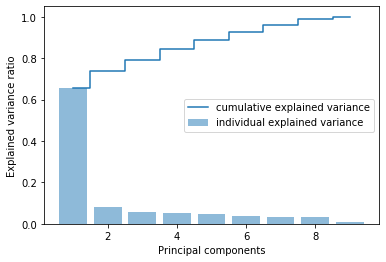

In [320]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [321]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer_df, y, test_size=test_size, random_state=seed)

# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:6])   # Reducing from 9 to 6 dimension space since we get 90% at 6th component

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot
Proj_data_df.head()

In [322]:
bc_centered = X - X.mean(axis=0)

In [323]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(bc_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [324]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
pca.fit(bc_centered)


PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [325]:
X_pca = pca.transform(bc_centered)

In [326]:
X_pca.shape

(699, 6)

In [327]:
pca.components_

array([[ 0.36119042,  0.46859855,  0.45744446,  0.16816428,  0.28880144,
         0.524134  ,  0.13857376,  0.16981832,  0.07911096],
       [ 0.15315537,  0.3702102 ,  0.29549479, -0.03316784,  0.24311594,
        -0.83018689, -0.01804228,  0.03925265,  0.02980991],
       [-0.91321553,  0.24143399,  0.19185929,  0.04522487,  0.24726859,
         0.07990676,  0.01005035,  0.03289836,  0.01347567],
       [ 0.08701921, -0.24523554, -0.41083747, -0.01607198,  0.865741  ,
         0.020364  , -0.00776707,  0.03415888,  0.1099642 ],
       [-0.03755238,  0.35528371, -0.55765895,  0.42320304, -0.17965486,
        -0.09819957,  0.34325489,  0.45746269,  0.11516916],
       [ 0.04701071,  0.61346408, -0.41845506, -0.19979997, -0.01855476,
         0.11826201, -0.33589202, -0.52845525,  0.00292856]])

# Q10 Find correlation between components and features

In [328]:
cancer_df.drop("Class", axis=1, inplace=True)

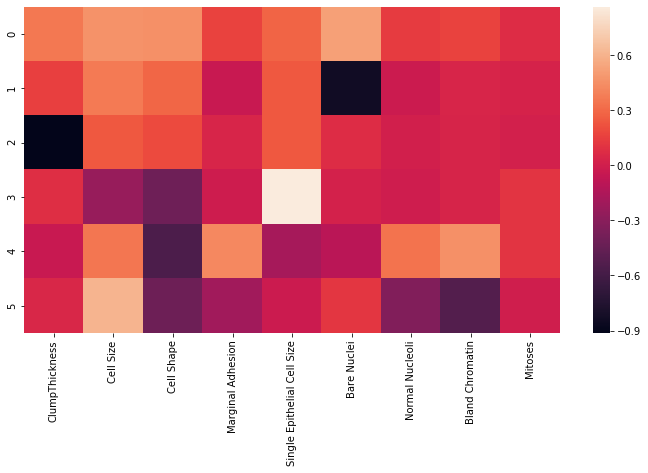

In [331]:
df_comp=pd.DataFrame(pca.components_,columns=list(cancer_df))
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

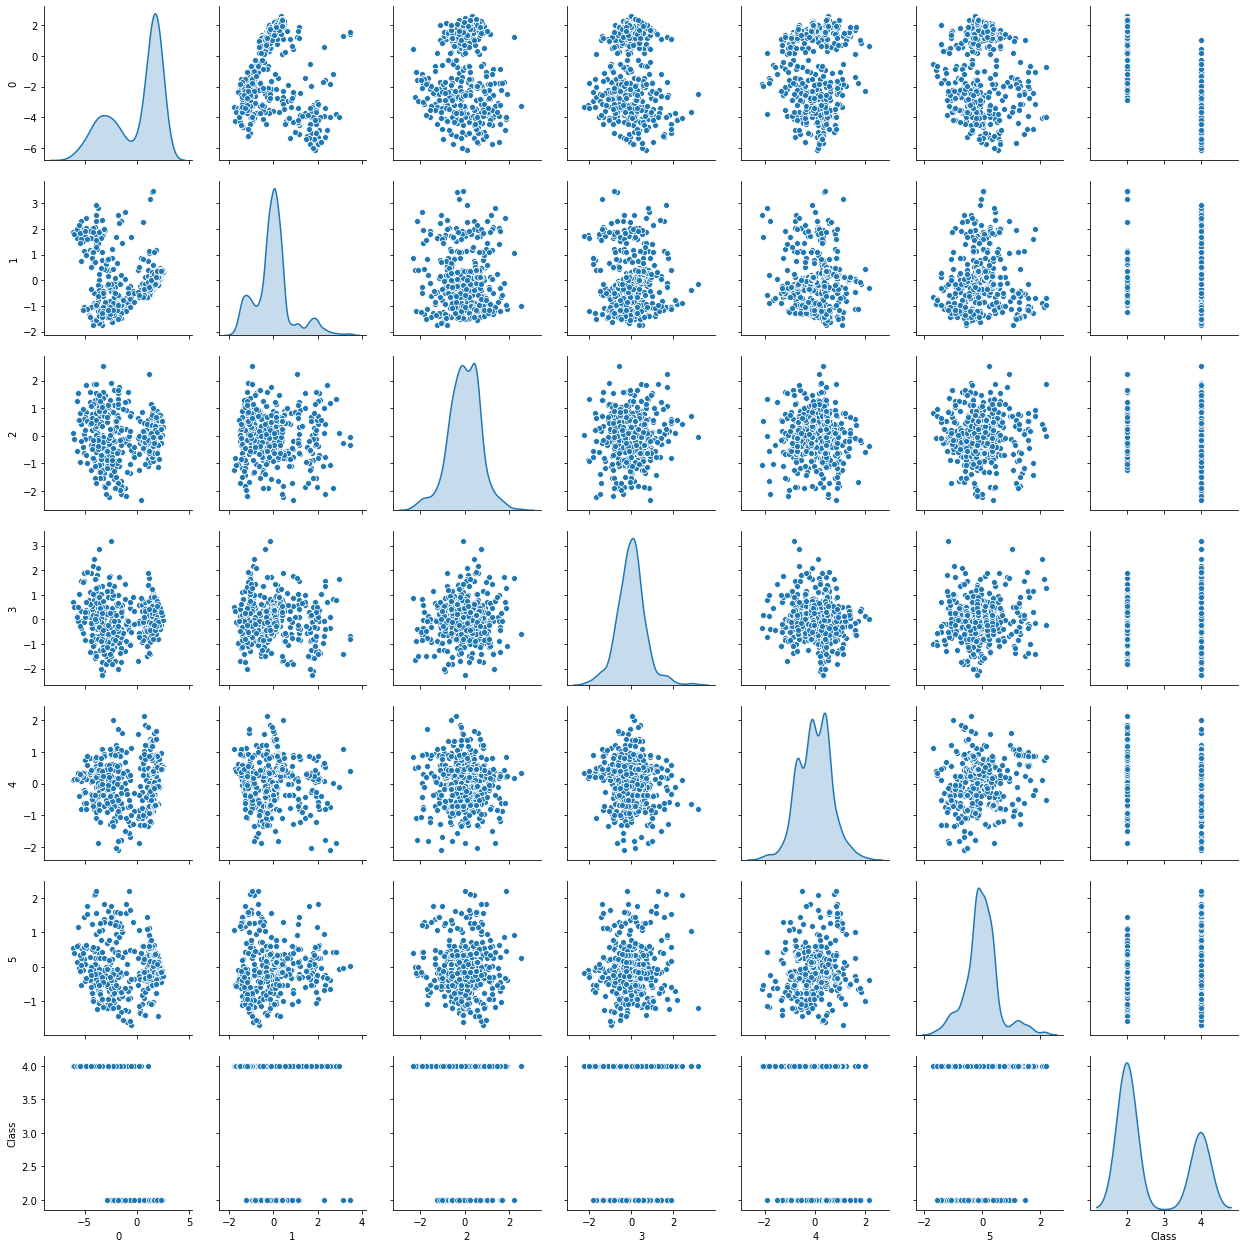

In [330]:
#Let us check it visually
Proj_data_cancer_df = Proj_data_df.join(Y)

sns.pairplot(Proj_data_cancer_df, diag_kind='kde') 

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [200]:
#2 Read the data as a data frame
# reading the CSV file into pandas dataframe

jokes_df = pd.read_csv(r"C:\Users\Admin\Downloads\Project_lab 5\jokes.csv") 
jokes_df.head() 

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [226]:
ratings_data = jokes_df.head(200).drop('NumJokes',axis=1)
ratings_data.head() 

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [227]:
ratings_data.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [228]:
ratings_data.describe()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.530050,0.593900,0.237650,-0.701000,-0.037900,1.320050,0.171500,-0.085300,0.016700,0.894700,...,0.56260,0.175100,1.155850,0.637900,0.581650,0.417550,0.755000,0.093700,0.135000,0.524400
std,4.507771,4.915306,4.471239,3.863859,5.433866,4.393323,5.627576,4.861652,4.037797,5.006043,...,2.93055,3.172647,3.199264,3.474739,3.314584,2.981439,3.243612,3.497441,3.265586,3.266252
min,-9.710000,-9.950000,-9.710000,-9.760000,-9.810000,-9.850000,-9.950000,-9.850000,-9.850000,-9.760000,...,-9.13000,-9.610000,-9.710000,-9.560000,-9.760000,-9.510000,-9.130000,-9.660000,-9.760000,-9.560000
25%,-0.852500,-2.595000,-0.727500,-1.685000,-4.220000,0.000000,-4.480000,-4.270000,-0.452500,-1.750000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.340000,0.000000,0.850000,0.680000,0.000000,0.680000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.412500,4.535000,2.330000,0.000000,4.232500,4.937500,4.685000,3.425000,1.335000,4.320000,...,0.00000,0.000000,1.612500,0.190000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000
max,9.270000,9.270000,9.270000,8.830000,9.220000,9.270000,9.270000,9.270000,9.030000,9.320000,...,9.08000,9.080000,9.170000,9.080000,9.130000,9.220000,9.170000,9.220000,8.980000,8.980000


In [229]:
ratings_data.info

<bound method DataFrame.info of      Joke1  Joke2  Joke3  Joke4  Joke5  Joke6  Joke7  Joke8  Joke9  Joke10  \
0    -7.82   8.79  -9.66  -8.16  -7.52  -8.50  -9.85   4.17  -8.98   -4.76   
1     4.08  -0.29   6.36   4.37  -2.38  -9.66  -0.73  -5.34   8.88    9.22   
2     0.00   0.00   0.00   0.00   9.03   9.27   9.03   9.27   0.00    0.00   
3     0.00   8.35   0.00   0.00   1.80   8.16  -2.82   6.21   0.00    1.84   
4     8.50   4.61  -4.17  -5.39   1.36   1.60   7.04   4.61  -0.44    5.73   
5    -6.17  -3.54   0.44  -8.50  -7.09  -4.32  -8.69  -0.87  -6.65   -1.80   
6     0.00   0.00   0.00   0.00   8.59  -9.85   7.72   8.79   0.00    0.00   
7     6.84   3.16   9.17  -6.21  -8.16  -1.70   9.27   1.41  -5.19   -4.42   
8    -3.79  -3.54  -9.42  -6.89  -8.74  -0.29  -5.29  -8.93  -7.86   -1.60   
9     3.01   5.15   5.15   3.01   6.41   5.15   8.93   2.52   3.01    8.16   
10   -2.91   4.08   0.00   0.00  -5.73   0.00   2.48  -5.29   0.00    1.46   
11    1.31   1.80   2.57  -2.38 

In [230]:
ratings_data.replace(to_replace = 99.00, value = 0, inplace = True)
ratings_data.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [238]:
ratings_mean = ratings_data.mean()
ratings_mean

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
Joke6      1.32005
Joke7      0.17150
Joke8     -0.08530
Joke9      0.01670
Joke10     0.89470
Joke11     1.16675
Joke12     1.34195
Joke13    -1.34810
Joke14     1.96950
Joke15    -1.57630
Joke16    -2.85160
Joke17    -0.82600
Joke18    -0.74145
Joke19     0.30400
Joke20    -0.82725
Joke21     2.56045
Joke22     0.93365
Joke23     0.34435
Joke24    -1.09905
Joke25     0.56475
Joke26     1.15680
Joke27     3.05240
Joke28     1.15585
Joke29     3.18995
Joke30    -0.70215
            ...   
Joke71    -0.15430
Joke72     1.12100
Joke73     0.36100
Joke74    -0.40885
Joke75    -0.14515
Joke76     0.67045
Joke77     0.21805
Joke78     0.72365
Joke79     0.27445
Joke80     0.57735
Joke81     0.49335
Joke82     0.30125
Joke83     0.88235
Joke84     0.40525
Joke85     0.42435
Joke86     0.24565
Joke87     0.60490
Joke88     0.83650
Joke89     1.44285
Joke90    -0.34395
Joke91     0.56260
Joke92     0

In [239]:
ratings_mean.nlargest(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

In [0]:
Joke 50 has the highest popularity